# Logistic Regression Notebook

This notebook is meant to test and visualize the results of our python script `LogisticRegression()`. <br><br>

We import the dataset <a href="https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database">**Pima Indians Diabetes DataSet** </a> stored in `datasets/diabetes.csv` and then build a binary classification model based on logistic regression. We train the model with the `fit()` method which uses gradient descent and finally we give a look to the model performances. <br><br>

<u>Note</u>: You may need to add the path to the `machine_learning/datasets/` repository to the list of directories where your Python interpreter searches for. This is done thanks to the following line of code : 
    
    import os
    os.sys.path.append("/path/to/machine_learning/datasets/")
    
<br>The other only libraries you need are `numpy`, `pandas` and `matplotlib.pyplot`. <br><br> Then you should be up and running to execute the whole notebook 👍

### imports

In [1]:
import os
os.sys.path.append('/Users/thomaswaldura/Documents/github/machine_learning/datasets')
import utils
import LogisticRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from LogisticRegression import *

### reading data

In [2]:
df = pd.read_csv('../datasets/diabetes.csv', sep=',', index_col=False)

dataset = np.array(df)

X_train, y_train, X_test, y_test = utils.split_dataset(dataset[:,:8], dataset[:,-1], 0.8)

### model creation

In [3]:
model = LogisticRegression()

### model training with gradient descent

In [4]:
errors = model.fit(X=X_train, y=y_train, n_epoch=500, lr=.008)

Start training for 500 epochs


### model evaluation

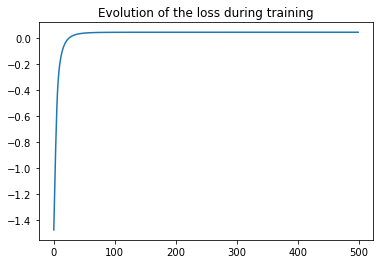

In [5]:
plt.plot(errors)
plt.title('Evolution of the loss during training')
plt.show()

In [6]:
accuracy = model.evaluate(X_test, y_test)

print(f'Accuracy on testing set : {round(accuracy, 4)}')

Accuracy on testing set : 0.7987


In [7]:
#confusion matrix

X_test_norm, _, _ = model.normalize(X_test, std=model.normalize_std_x, mean=model.normalize_mean_x)

y_pred = model.predict(X_test_norm)

y_test = y_test.reshape(154,)
y_pred = y_pred.reshape(154,)

y_test = pd.Series(y_test, name='Target')
y_pred = pd.Series(y_pred, name='Predictions')

df_confusion = pd.crosstab(y_test, y_pred, rownames=['Targets'], colnames=['Predictions'], margins=True)

print(df_confusion)

Predictions    0   1  All
Targets                  
0.0           88  12  100
1.0           19  35   54
All          107  47  154
